In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

# print("Path to dataset files:", path)

In [ ]:
import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader, random_split, TensorDataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import trange

In [ ]:
df_train = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df_test = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")
df_target = df_train["price_range"]
df_train.drop(["price_range"], axis="columns", inplace=True)
scaler = StandardScaler()
df_train[["battery_power","clock_speed","m_dep","mobile_wt",
        "int_memory","px_height","px_width","ram",
        "sc_h","sc_w","talk_time"]] = scaler.fit_transform(df_train[["battery_power","clock_speed","m_dep","mobile_wt",
        "int_memory","px_height","px_width","ram",
        "sc_h","sc_w","talk_time"]])
tensor_train = torch.tensor(df_train.values)
tensor_target = torch.tensor(df_target.values)
x_tensor = TensorDataset(tensor_train, tensor_target)
train_size = int(0.8* len(x_tensor))
val_size = len(x_tensor) - train_size
x_train, x_val = random_split(x_tensor, [train_size, val_size])
train_loader = DataLoader(x_train, batch_size=128)
val_loader = DataLoader(x_val, batch_size=128)
class MyNN(nn.Module):
  def __init__(self, num_inputs, num_classes):
    super().__init__()
    self.seq = nn.Sequential(
        nn.Linear(num_inputs, 32),
        nn.Dropout(0.25),
        nn.BatchNorm1d(32),
        nn.LeakyReLU(),
        nn.Linear(32, 8),
        nn.Dropout(0.25),
        nn.BatchNorm1d(8),
        nn.ReLU(),
        nn.Linear(8, num_classes)
    )
  def forward(self, x):
    return self.seq(x)
neural_network = MyNN(20, 4)
loss_func = nn.CrossEntropyLoss()
opt = torch.optim.Adam(neural_network.parameters(), lr=1e-3,weight_decay=1e-4)
list_loss_train = []
list_loss_val = []
for epoch in (pbar := trange(1000)):
  for train, val in zip(train_loader, val_loader):
    neural_network.train()
    x_train = train[0].float()
    y_train = train[1].long()
    x_val = val[0].float()
    y_val = val[1].long()
    y_pred_train = neural_network(x_train)
    loss_train = loss_func(y_pred_train, y_train)
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    neural_network.eval()
    with torch.inference_mode():
      loss_val = loss_func(neural_network(x_val), y_val)
      list_loss_val.append(loss_val)
      list_loss_train.append(loss_train.detach())
plt.plot(range(len(list_loss_train)), list_loss_train, c="r")
plt.plot(range(len(list_loss_val)), list_loss_val, c="g")

 37%|███▋      | 374/1000 [00:10<00:15, 39.24it/s]

In [ ]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [ ]:
y_test = df_test["price_range"]
x_test = df_test.drop("price_range", axis="columns")

KeyError: 'price_range'

array([1, 2, 3, 0])

100%|██████████| 100/100 [00:04<00:00, 20.22it/s]


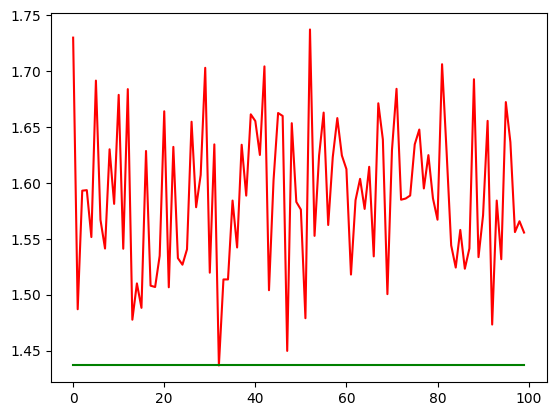

In [ ]:
list_loss_train = []
list_loss_val = []

for epoch in (pbar := trange(100)):
    running_loss_train = 0.0
    running_loss_val = 0.0
    num_batches = 0

    for train, val in zip(train_loader, val_loader):
        neural_network.train()
        x_train = train[0].float()
        y_train = train[1].long()

        x_val = val[0].float()
        y_val = val[1].long()

        y_pred_train = neural_network(x_train)
        loss_train = loss_func(y_pred_train, y_train)

        opt.zero_grad()
        loss_train.backward()
        opt.step()

        neural_network.eval()
        with torch.inference_mode():
            y_pred_val = neural_network(x_val)
            loss_val = loss_func(y_pred_val, y_val)

        running_loss_train += loss_train.item()
        running_loss_val += loss_val.item()
        num_batches += 1

    # Average over all batches
    list_loss_train.append(running_loss_train / num_batches)
    list_loss_val.append(running_loss_val / num_batches)

    # Optional: update progress bar description
    pbar.set_description(f"Epoch {epoch+1} | Train Loss: {list_loss_train[-1]:.4f} | Val Loss: {list_loss_val[-1]:.4f}")


Epoch 100 | Train Loss: 1.4487 | Val Loss: 1.4077: 100%|██████████| 100/100 [00:06<00:00, 15.99it/s]


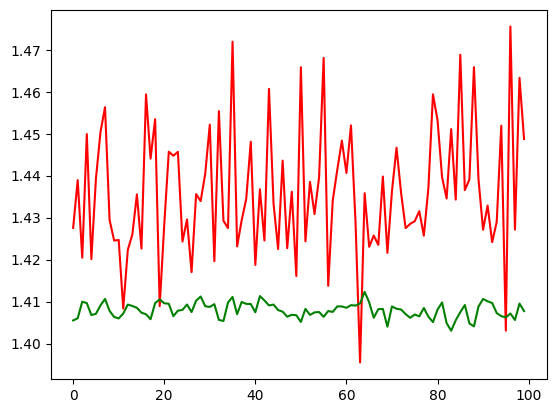

In [ ]:
plt.plot(range(len(list_loss_train)), list_loss_train, c="r")
plt.plot(range(len(list_loss_val)), list_loss_val, c="g")